In [9]:
using PyPlot

In [19]:
n = 10000

10000

In [20]:
w = randexp(n + 1)
w = w / sum(w)
for i in 1:n
    w[i + 1] += w[i]
end

pop!(w)

w;

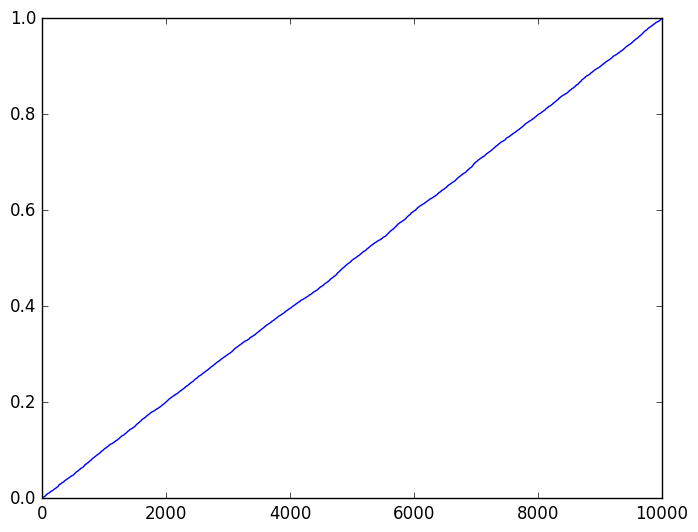

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320b43d90>

In [21]:
plot(w)

In [8]:
n = 1000000
a = []
@time for i in 1:100
    a = rand(n);
end
@time for i in 1:100
    a = randexp(n)[randperm(n)];
end
@time for i in 1:100
    a = zeros(n);
end

  0.428800 seconds (400 allocations: 762.949 MB, 25.84% gc time)
 11.657496 seconds (1000 allocations: 2.235 GB, 2.90% gc time)
  0.302704 seconds (200 allocations: 762.946 MB, 35.64% gc time)


we can probably get something faster by doing n rand()s than by calling array[randperm(n)]

In [2]:
include("../src/newFastSampler.jl")

epsequal (generic function with 1 method)

In [9]:
p = rand(n);

In [10]:
@time for i in 1:100
    s = newSampler(p);
    samps = newSampleMany(s, n)
end

 25.255554 seconds (100.05 M allocations: 6.706 GB, 11.93% gc time)
